### **Importing Necessary Libraries**

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
df = pd.read_csv('/content/AirPassengers.csv')

In [45]:
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


### **EDA**

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [47]:
df.shape

(144, 2)

In [48]:
df['Month'] = pd.to_datetime(df['Month'])

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [50]:
df.index = df['Month']

In [51]:
df.drop('Month', axis=1, inplace=True)

In [52]:
df.head(12)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


### **Time Series Visualization**

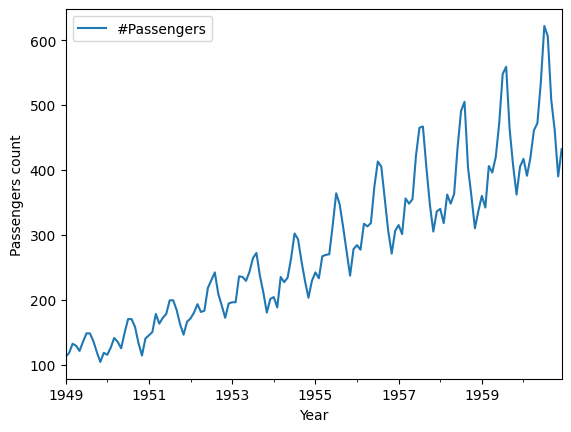

In [53]:
df.plot()
plt.xlabel('Year')
plt.ylabel('Passengers count')
plt.show()

# **Stationarizing the Time Series**

### **Adfuller Test**
H0 = The time series is non-stationary

H1 = the time series is Stationary

In [54]:
from statsmodels.tsa.stattools import adfuller

In [55]:
def adfuller_test(df):
  result = adfuller(df['#Passengers'])
  print(f'The p-value = {result[1]}')
  if result[1] < 0.05:
    print('We reject the null hypothesis, Time Series is stationary')
  else:
    print('\n We fail to rejet the null hypothesis, Time Series is non stationary')

In [56]:
adfuller_test(df)

The p-value = 0.991880243437641

 We fail to rejet the null hypothesis, Time Series is non stationary


### **Rolling mean and standard deviation**

In [57]:
rolling_mean = df.rolling(window=12).mean()
rolling_std = df.rolling(window=12).std()

In [58]:
rolling_mean.head(12)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


### **Detrending**

In [59]:
df_detrended = df - rolling_mean
df_detrended.head(12)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


### **Visualizing the Stationarized Time Series**

<Axes: title={'center': 'Detrended data'}, xlabel='Month'>

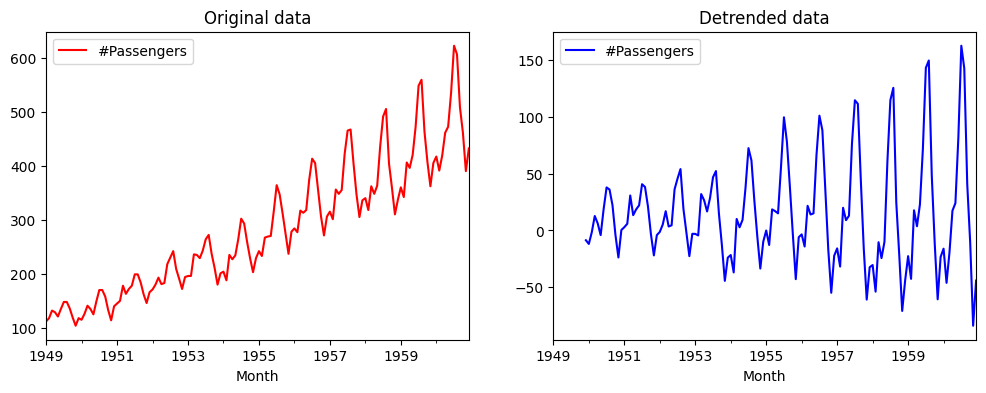

In [60]:
ax1 = plt.subplot(1,2,1)
df.plot(figsize=(12,4), color='red', title='Original data', ax=ax1)

ax2 = plt.subplot(1,2,2)
df_detrended.plot(figsize=(12,4), color='blue', title='Detrended data', ax=ax2)

In [61]:
df_detrended.dropna(inplace=True)

In [62]:
adfuller_test(df_detrended)

The p-value = 0.022104139473878875
We reject the null hypothesis, Time Series is stationary


### **Checking stationarity using plot**

In [63]:
m = df_detrended.rolling(window=12).mean()
s = df_detrended.rolling(window=12).std()

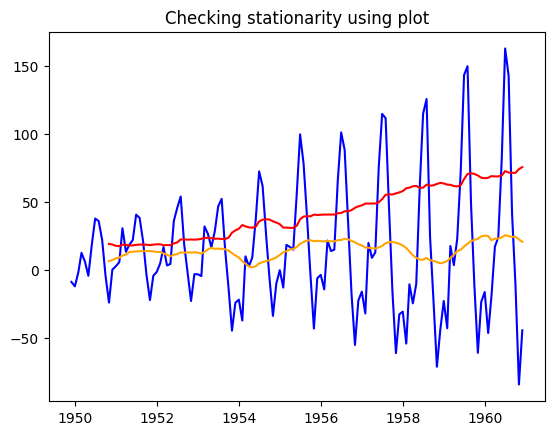

In [64]:
 plt.plot(df_detrended, color='blue')
 plt.plot(m, color='orange')
 plt.plot(s, color='red')
 plt.title('Checking stationarity using plot')
 plt.show()

### **Train Test Split**

In [65]:
train = df_detrended[:120] # 10 Years
test = df_detrended[121:] # 1 Year

In [66]:
train

,#Passengers
Month,
1949-12-01,-8.666667
1950-01-01,-11.916667
1950-02-01,-1.583333
1950-03-01,12.666667
1950-04-01,6.166667
...,...
1959-07-01,143.083333
1959-08-01,149.583333
1959-09-01,48.666667


## **Model Buildong**

In [67]:
from statsmodels.tsa.arima.model import ARIMA

In [68]:
model = ARIMA(train, order = (1,0,2))

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [69]:
model_fit = model.fit()

In [70]:
df_detrended['Predicted'] = model_fit.predict(start=len(train), end=len(train) + len(test) -1)

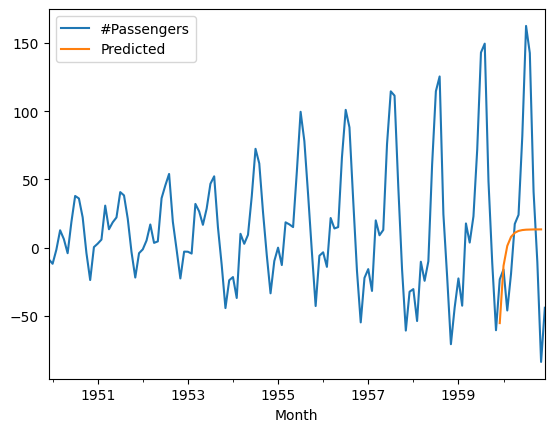

In [71]:
df_detrended[['#Passengers','Predicted']].plot()
plt.show()

### **Auto ARIMA**

In [72]:
# !pip install numpy==1.23.5 scipy==1.10.1

In [73]:
# !pip install pmdarima

In [74]:
from pmdarima import auto_arima

In [75]:
auto = auto_arima(df_detrended['#Passengers'])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

In [76]:
auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  133
Model:               SARIMAX(3, 0, 2)   Log Likelihood                -612.905
Date:                Sun, 06 Jul 2025   AIC                           1239.810
Time:                        16:17:21   BIC                           1260.043
Sample:                    12-01-1949   HQIC                          1248.032
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      6.8579      1.701      4.033      0.000       3.525      10.191
ar.L1          0.8625      0.171      5.045      0.000       0.527       1.198
ar.L2          0.2071      0.236      0.878      0.380      -0.255       0.670
ar.L3         -0.5239      0.142     -3.683      0.000      -0.803      -0.245
ma.L1          0.0684      0.138      0.496      0.620      -0.202       0.338
ma.L2         -0.7564      0.091     -8.293      0.000      -0.935      -0.578
sigma2       577.4777     71.847      8.038      0.000     436.660     718.295
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 8.11
Prob(Q):                              0.89   Prob(JB):                         0.02
Heteroskedasticity (H):               6.21   Skew:                             0.56
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## **SARIMAX**

In [77]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [78]:
model_sarimax = SARIMAX(train, order=(3,0,2), seasonal_order=(3,0,2,12))

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [79]:
model_fit_sarimax = model_sarimax.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [80]:
df_detrended['Predicted'] = model_fit_sarimax.predict(start=len(train), end=len(train) + len(test) -1)

### **Prediction Plot**

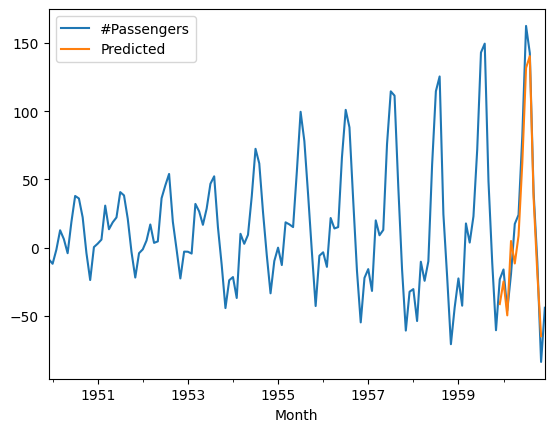

In [81]:
df_detrended[['#Passengers','Predicted']].plot()
plt.show()

### **Forecasting**

In [82]:
forecast=model_fit_sarimax.get_forecast(steps=24) #(test + next period) (12 + 12)
future_preds = forecast.predicted_mean

In [83]:
future_preds

,predicted_mean
1959-12-01,-41.495672
1960-01-01,-24.927291
1960-02-01,-49.763368
1960-03-01,4.785606
1960-04-01,-11.665880
1960-05-01,8.698795
1960-06-01,62.100697
1960-07-01,131.800123
1960-08-01,140.425823
1960-09-01,36.884048


### **Forecasted Plot**

<Axes: xlabel='Month'>

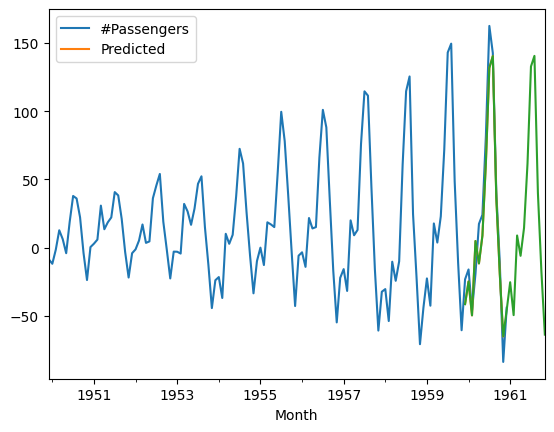

In [84]:
df_detrended.plot()
future_preds.plot()